Extended coursework dynamic analysis

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


In [144]:
# read matlab .mat file
import scipy.io as sio
undamped_contents = sio.loadmat('data/undamped_full_transfer_floor_2.mat')
undamped_in = np.array(undamped_contents['data_in'])

damped_contents = sio.loadmat('data/3dampers_transfer_floor_2.mat')
damped_in = np.array(damped_contents['data_in'])



FileNotFoundError: [Errno 2] No such file or directory: 'data/3dampers_transfer_floor_2.mat'

(72000, 2) (72000, 2)


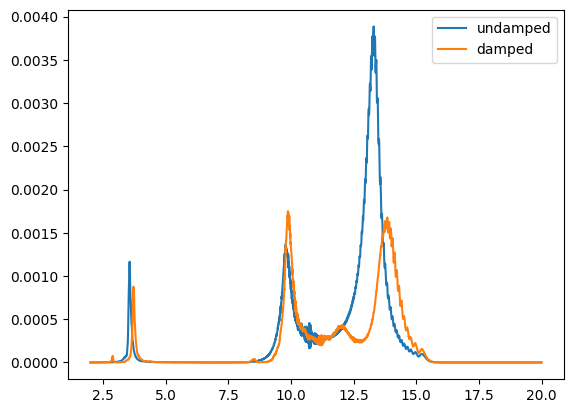

In [ ]:
f = 300 # hz
N = undamped_in.shape[0] // 2

print(undamped_in.shape, damped_in.shape)

t = np.linspace(0, N/f, N)

# plot data

plt.figure(1)
damped = (damped_in[:N,1] + damped_in[N:,1]) / 2
undamped = (undamped_in[:N,1] + undamped_in[N:,1]) / 2

damped_dtf = np.abs(np.fft.fft(damped) / N) ** 2
undamped_dtf = np.abs(np.fft.fft(undamped) / N) ** 2
#freq_factor = 13.3 / np.argmax(dtf)
freq_factor = 0.008094948265368229
freqs =  freq_factor * np.arange(0, N)
# find where the frequency < 20
li = np.where(freqs < 2)[0][-1]
ui = np.where(freqs > 20)[0][0]

plt.plot(freqs[li:ui], undamped_dtf[li:ui], label='undamped')
plt.plot(freqs[li:ui], damped_dtf[li:ui], label='damped')

plt.legend()
# unable to get frequency axis

As you can see the resonant response has been reduced in modes 1 and 3, however the resonant response in mode 2 has increased. This is due to second order effects of other absorbers, which were not accounted for as we tuned each absorber seperately to reduce the number of variables of the problem. 

AttributeError: 'Figure' object has no attribute 'title'

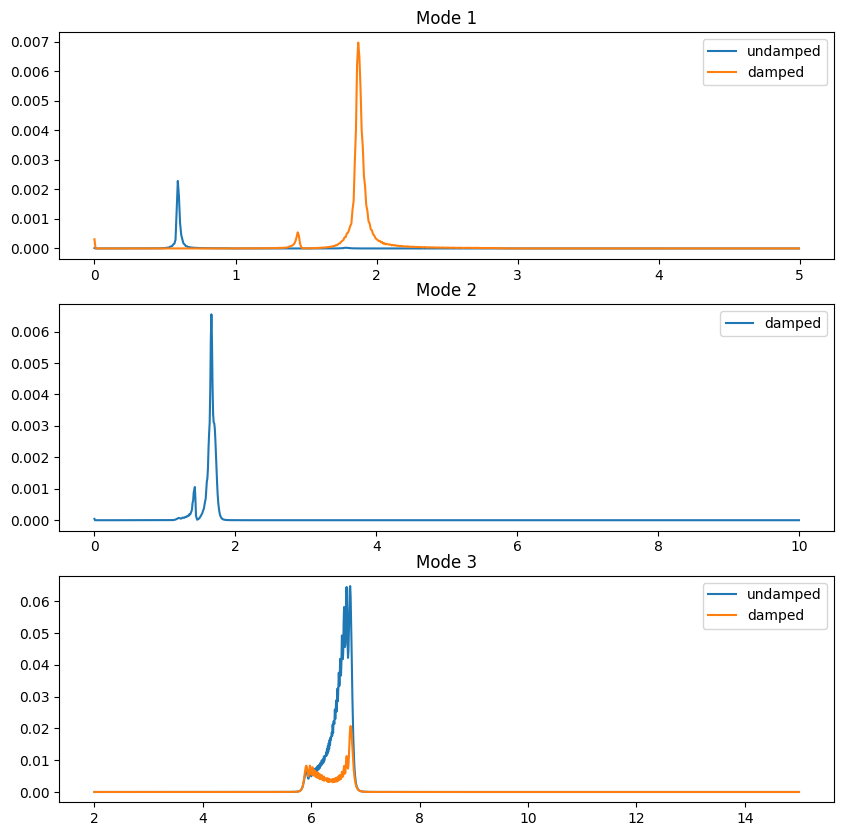

In [155]:


# mode 1 was done on floor 3
m1_undamped_raw = sio.loadmat('data/mode1/undamped_transfer_floor_2.mat')['data_in']
m1_damped_raw = sio.loadmat('data/mode1/damped_transfer_floor_2.mat')['data_in']
N = m1_undamped_raw.shape[0] // 2
m1_undamped = (m1_undamped_raw[:N,1] + m1_undamped_raw[N:,1]) / 2
N = m1_damped_raw.shape[0] // 2
m1_damped = (m1_damped_raw[:N,1] + m1_damped_raw[N:,1]) / 2

# mode 2 was done on floor 1 but floor 3 shows the same results
#m2_undamped_raw = sio.loadmat('data/mode2/undamped_harmonic_floor_2.mat')['data_in'] # ??? missing from data
m2_damped_raw = sio.loadmat('data/mode2/damped_transfer_floor_3.mat')['data_in']
#N = m2_undamped_raw.shape[0] // 2
#m2_undamped = (m2_undamped_raw[:N,1] + m2_undamped_raw[N:,1]) / 2
N = m2_damped_raw.shape[0] // 2
m2_damped = (m2_damped_raw[:N,1] + m2_damped_raw[N:,1]) / 2

# mode 3 was done on floor 2
m3_undamped_raw = sio.loadmat('data/mode3/undamped_transfer_floor_2.mat')['data_in']
m3_damped_raw = sio.loadmat('data/mode3/damped_transfer_floor_2.mat')['data_in']
N = m3_undamped_raw.shape[0] // 2
m3_undamped = (m3_undamped_raw[:N,1] + m3_undamped_raw[N:,1]) / 2
N = m3_damped_raw.shape[0] // 2
m3_damped = (m3_damped_raw[:N,1] + m3_damped_raw[N:,1]) / 2

m1_undamped_dtf = np.abs(np.fft.fft(m1_undamped) / N) ** 2
m1_damped_dtf = np.abs(np.fft.fft(m1_damped) / N) ** 2
#m2_undamped_dtf = np.abs(np.fft.fft(m2_undamped) / N) ** 2
m2_damped_dtf = np.abs(np.fft.fft(m2_damped) / N) ** 2
m3_undamped_dtf = np.abs(np.fft.fft(m3_undamped) / N) ** 2
m3_damped_dtf = np.abs(np.fft.fft(m3_damped) / N) ** 2

#plt.subplots(3,1, sharex=True)
fig, axs = plt.subplots(3,1, figsize=(10,10))

li = 0
ui = np.where(freqs > 5)[0][0]
axs[0].plot(freqs[li:ui], m1_undamped_dtf[li:ui], label='undamped')
axs[0].plot(freqs[li:ui], m1_damped_dtf[li:ui], label='damped')
axs[0].set_title('Mode 1')
axs[0].legend()

li = 0
ui = np.where(freqs > 10)[0][0]
#axs[1].plot(freqs[li:ui], m2_undamped_dtf[li:ui], label='undamped')
axs[1].plot(freqs[li:ui], m2_damped_dtf[li:ui], label='damped')
axs[1].set_title('Mode 2')
axs[1].legend()

li = np.where(freqs < 2)[0][-1]
ui = np.where(freqs > 15)[0][0]
axs[2].plot(freqs[li:ui], m3_undamped_dtf[li:ui], label='undamped')
axs[2].plot(freqs[li:ui], m3_damped_dtf[li:ui], label='damped')
axs[2].set_title('Mode 3')
axs[2].legend()

plt.title('Damped and Undamped Transfer Functions')